In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sympy as sy
from scipy.integrate import quad

### Area and Volume

- Find area between curves
- Determine volume of a surface with known cross-sections
- Determine the volume of a solid of revolution

#### Example

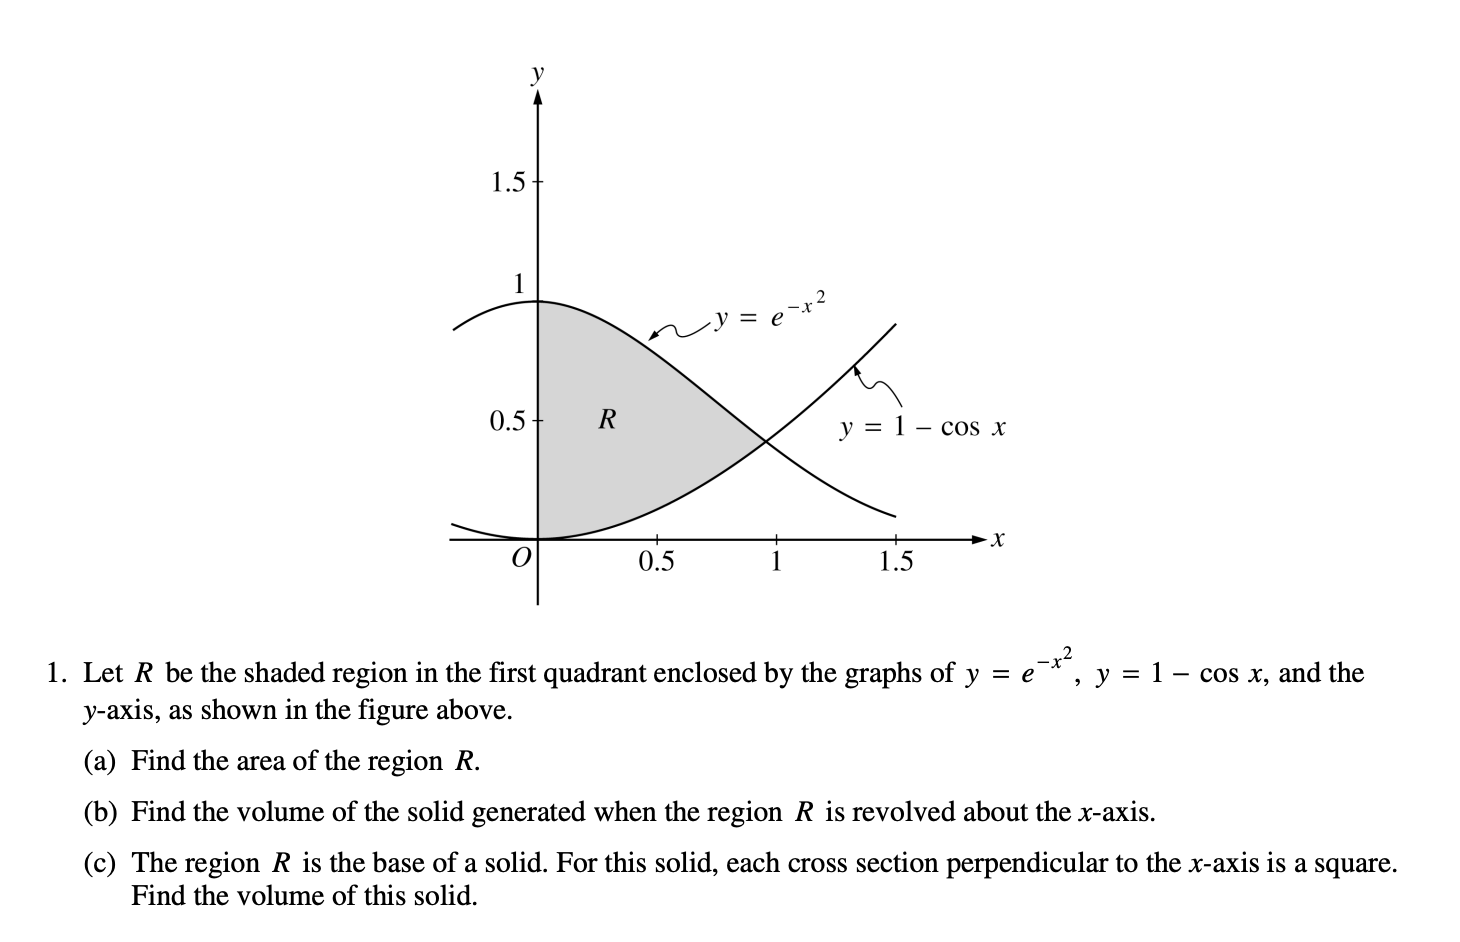

In [ ]:
from scipy.optimize import root

In [ ]:
def y1(x): return np.exp(-x**2)
def y2(x): return 1 - np.cos(x)
def area_R(x): return y1(x) - y2(x)

In [ ]:
root(area_R, x0 = 1)

 message: The solution converged.
 success: True
  status: 1
     fun: [-5.551e-17]
       x: [ 9.419e-01]
  method: hybr
    nfev: 6
    fjac: [[-1.000e+00]]
       r: [ 1.584e+00]
     qtf: [ 1.149e-12]

In [ ]:
quad(area_R, 0, .94) #area approximation & error bound

(0.59095945588846, 6.560967945473228e-15)

In [ ]:
def vol1(x): return y1(x)**2 - y2(x)**2
quad(vol1, 0, .94)

(0.5559620689865773, 6.1724188980713775e-15)

In [ ]:
.555962*np.pi

1.7466061348750883

In [ ]:
def vol2(x): return (y1(x) - y2(x))**2
quad(vol2, 0, .94)

(0.46106350455596723, 5.118833185724006e-15)

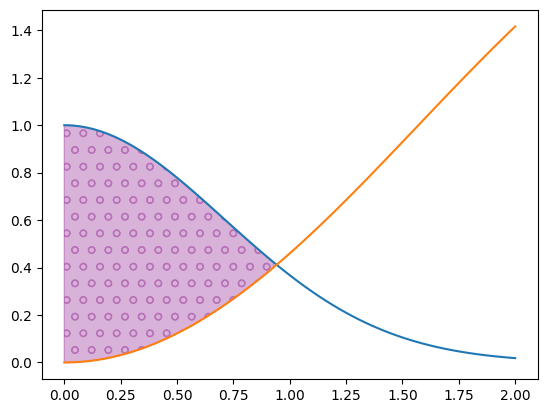

In [ ]:
x = np.linspace(0, 2, 100)
plt.plot(x, y1(x))
plt.plot(x, y2(x))
plt.fill_between(x, y1(x), y2(x), color = 'purple', hatch = 'o', where = x < .94, alpha = 0.3)

#### Example

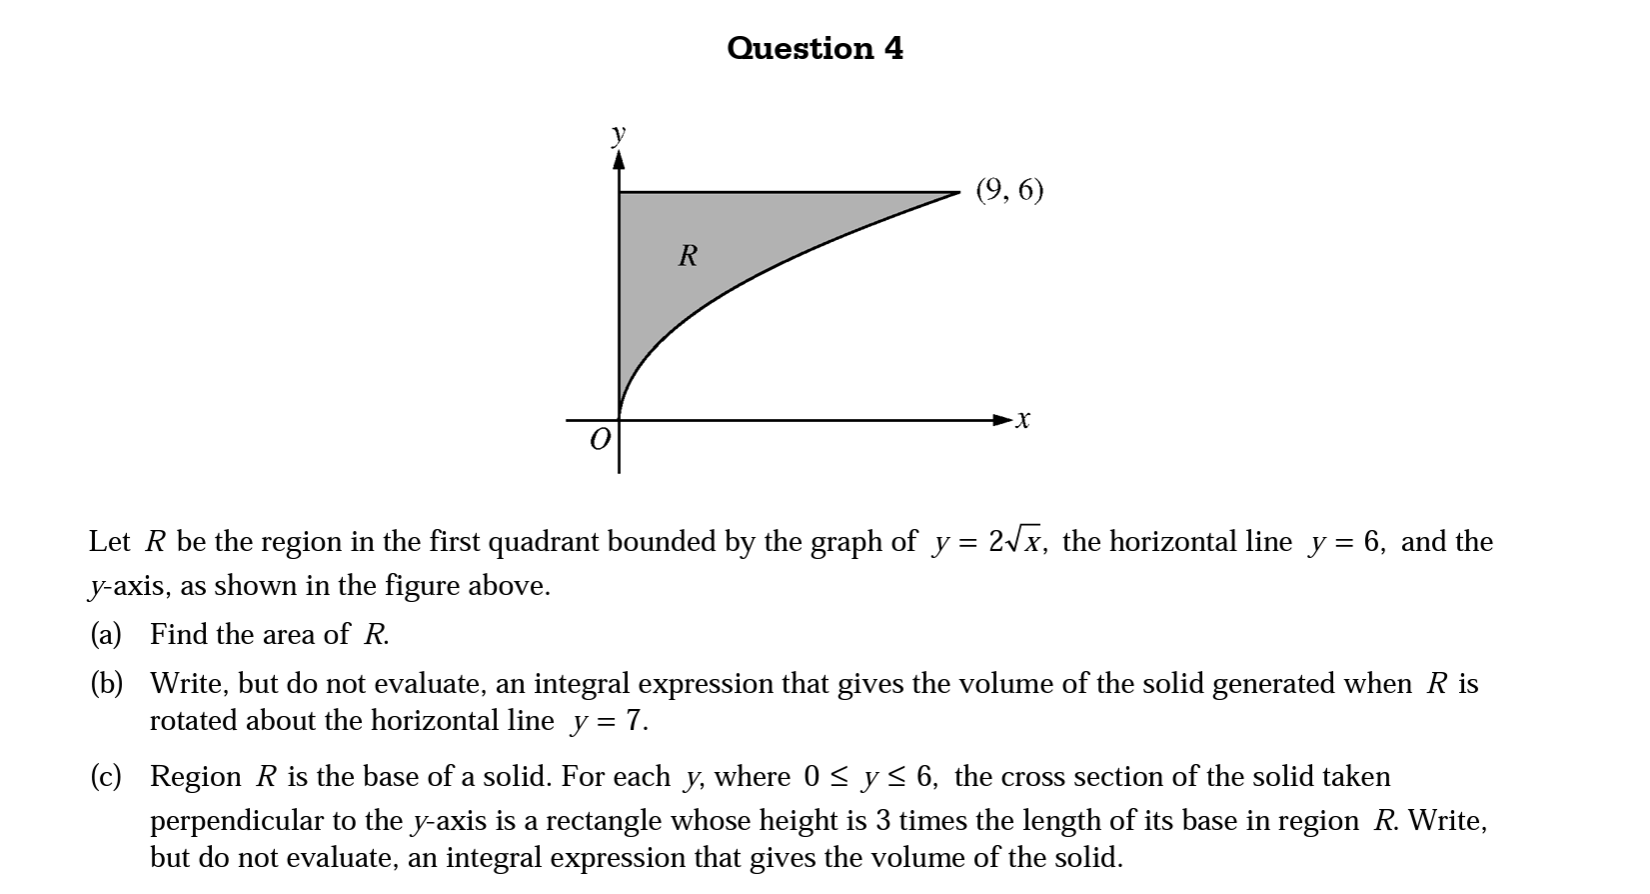

# Center of Mass

Our goal is to discuss the center of mass in discrete and continuous cases.  We will use the discrete examples to motivate the passage to the limit, and again see the interplay of summation and integration.

### The Lever



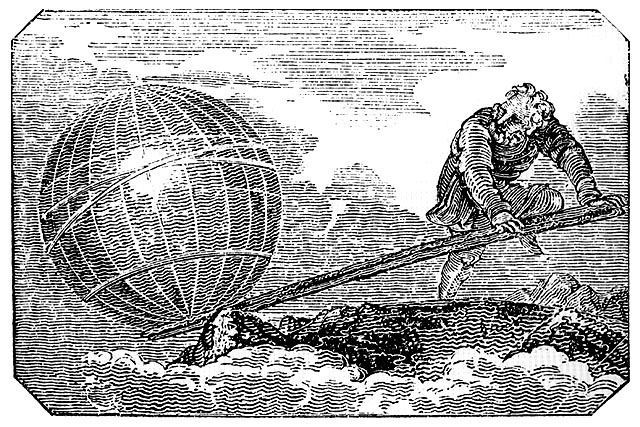





> *"We are a perverse lot. Although Archimedes (287-212 B.c.) is acknowledged
as the greatest of the Greek mathematicians, it is customary not to
credit him with what he did do and to credit him with what he did not
do. His ingenious methods of computing areas and volumes brought
mathematics to the threshold of the integral calculus, yet the textbook
gives full credit for the calculus to Newton and Leibniz. He initiated the
science of mechanics by discovering the conditions of equilibrium of a
lever, yet it often is said that he discovered the lever itself-despite
Egyptian pyramid builders using levers thousands of years before he was
born."*--George Polya

Today, we will follow Polya and Archimedes to determine the law of the lever.  We will move this to the two dimensional case, and push this to uniform regions in the 2-Dimensional plane.  We will do all of this in symbols and with Python.



#### The Path

**Axiom I**: Equal weights at equal distances are in equilibrium.

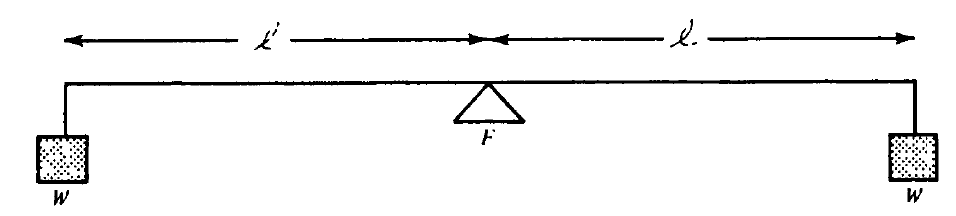
![](images/ax1.png)

**Axiom II**: $W$ at each end $\cong 2W$ in middle.

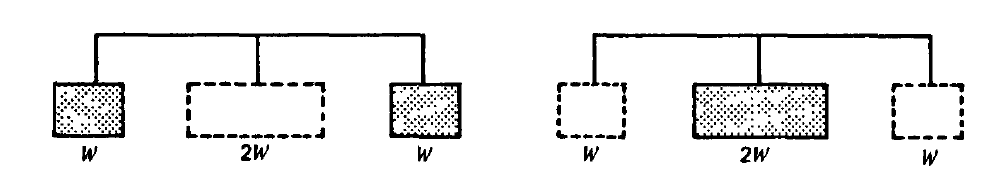
![](images/ax2.png)

#### Generalizing

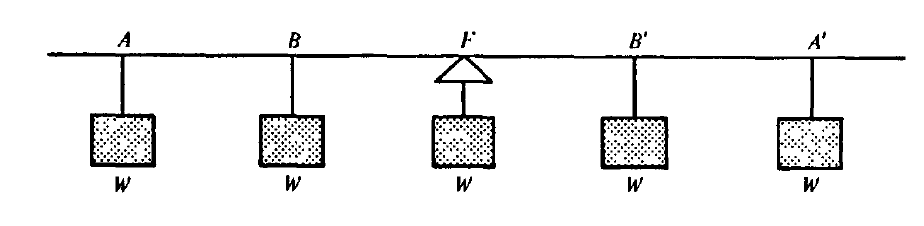
![](images/ax2b.png)
![](images/ax2c.png)
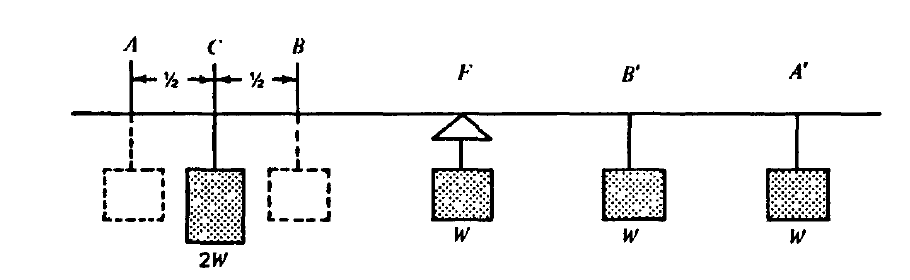
![](images/ax2d.png)

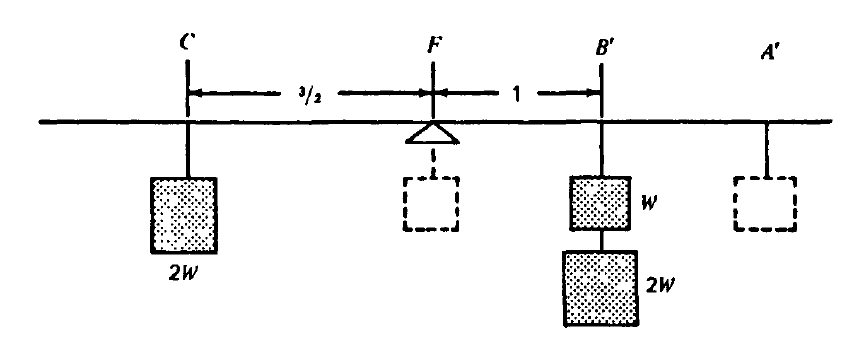
Thus, we propose that:

$$weight \times distance = weight \times distance$$

These values determined by *weight $\times$ distance* are called **moments**.  A SeeSaw full of robots will be in equilibrium, or balanced, when the moments to the left of the fulcrum are equal to the moments to the right.

### Solving A 1-D Problem two ways

Suppose we have three masses distributed on a lever, as shown in the image below:

![](images/masses1.png)


Here, the center of mass is determined by the following definition:

$$\bar{x} = \frac{\sum m_n x_n}{\sum m_n}$$

For example, we can choose masses 1, 3, and 2 located at distances 1, 3, and 7 from the left end of the lever respectively.  Using the definition, we have

$$\bar{x} = \frac{M_x}{M} \rightarrow \frac{1*1 + 3*3 + 2*7}{1+3+2} ~\text{or} ~4$$

We should be able to work in reverse from the picture and distribute weights evenly as we had done with Archimedes as a method to check.





**Problems**

Compute the center of mass of the system:

- $m_1 = 2$ at $x_1 = 1$, $m_2 = 4$ at $x_2 = 2$.



Use the table below to find the center of mass of the five points.  Can you plot the points and their resulting center?

| Mass (grams) | $x$-coordinate |
| ----------   | ------------   |
|  50  | -10 |
| 20 | 25 |
| 10 | 30 |
| 30 | 45 |
| 20 | 60 |

In [ ]:
M_i = np.array([50, 20, 10, 30, 20])
X_i = np.array([-10, 25, 30, 45, 60])
M_i@X_i/M_i.sum()

21.923076923076923

**PROBLEM**

Find the center of mass of the system:

| Mass | $x$-coordinate |
| ----- | ----------- |
| 15 | 20 |
| 10 | 35 |
| 20 | 50 |

### 2-D Case: Discrete Point Masses

The formulas might be what we expect, however, we should note the presence of the $M_y$ in the $x$-coordinate and the $M_x$ in the $y$-coordinate.


$$\bar{x} = \frac{M_y}{M}= \frac{\sum m_nx_n}{\sum m_n} \quad \bar{y} = \frac{M_x}{M} = \frac{\sum m_ny_n}{\sum m_n}$$

Thus, if we have masses 1 and 4 located at points $(1,0)$ and $(0,1)$ respectively, we have a center of mass at

$$\bar{x} = \frac{1*1 + 4*0}{1 + 4} \quad \bar{y} = \frac{1*0 + 4*1}{1+4}$$

$$\bar{x} = \frac{1}{5} \quad \bar{y}= \frac{4}{5}$$



In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy

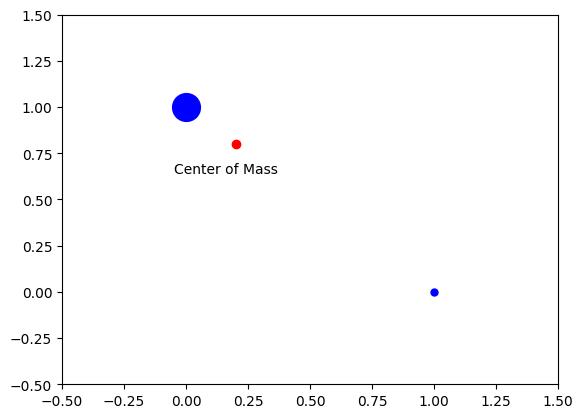

In [13]:
ax = plt.figure()
plt.plot(0, 1, 'o', color = 'blue', markersize = 20)
plt.plot(1,0, 'o', color = 'blue', markersize = 5)
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.plot(0.2, 0.8, 'o', color = 'red')
ax.text(.3, 0.55, 'Center of Mass');


Put masses of 5, 3, and 2 at points (1,0), (0, 1), (-1, 0) respectively.  Where do they balance??  Draw me a plot.

In [ ]:
(5*1 + 3*0 + 2*-1)/(5 + 3 + 2)

0.3

In [ ]:
(5 * 0 + 3 * 1 + 2 * 0)/10

0.3

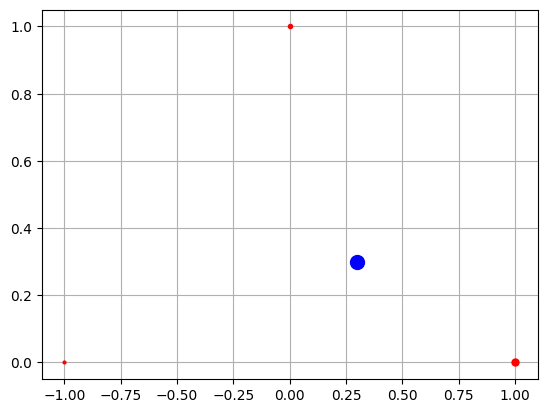

In [ ]:
plt.plot(1, 0, 'ro', markersize = 5)
plt.plot(0, 1, 'ro', markersize = 3)
plt.plot(-1, 0, 'ro', markersize = 2)
plt.plot(.3, .3, 'bo', markersize = 10)
plt.grid();

#### Integrating with Respect to $y$

In all our examples to this point we have integrated along the $x$-axis.  This is not the only direction we might use however, and the same ideas can be applied if we instead desire to integrate in the vertical direction.  Consider the curve determined by:

$$x = y^2 - 9$$

from $y = -6$ to $y = 6$.

### 2-D Continuous Region

For this example, we consider the components $M_x, M_y, M$ and their meaning if we have a solid two dimensional region with uniform density.

<center>
mass M = area of plate
$~$
<center>
moment $M_x = \int$(distance $x$)(length of vertical strip)$dx$

<center>
moment $M_y = \int$(height $y$)(length of horizontal strip)$dy$

For example, suppose a plate has sides $x=0$, $y=0$, and the line $y=4-2x$

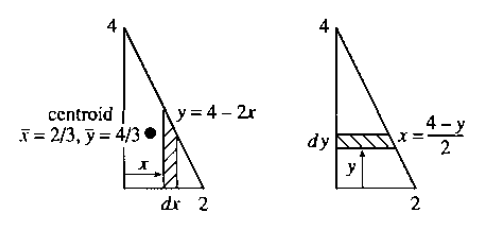
![](images/masses3.png)

Thus, we have:

- $M=\int_0^2 (4-2x)dx$
- $M_x = \int_0^2 x(4-2x)dx$
- $M_y = \int_0^2 y\frac{1}{2}(4-y)dy$





**Problems**

- Find the area $M$ and the centroid $\bar{x}, \bar{y}$ inside the curve $y = \sqrt{1 - x^2}$ in the first quadrant.

$$M_x = \int_0^1 x * \sqrt{1 - x^2} dx$$

$$M_y = \int_0^1 y * \sqrt{1 - y^2}$$

$$M = \int_0^1 \sqrt{1 - x^2}$$

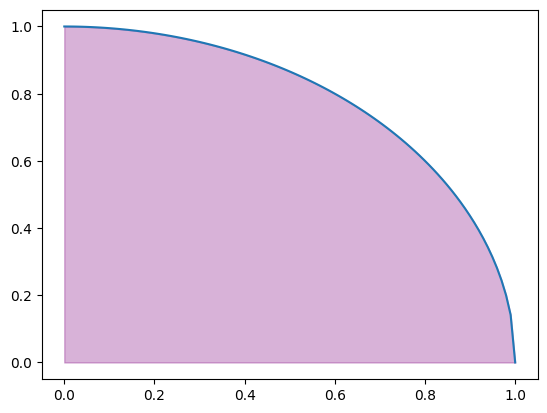

In [ ]:
def y(x): return np.sqrt(1 - x**2)
x = np.linspace(0, 1, 100)
plt.plot(x, y(x))
plt.fill_between(x, y(x), color = 'purple', alpha = 0.3)

**PROBLEM**

Find the center of mass of the following regions:

- The region bounded above by the curve $y = 2 - x^2$ and below by the $x$-axis.

$$M_x = ??$$

$$M_y = ??$$

$$M = ??$$

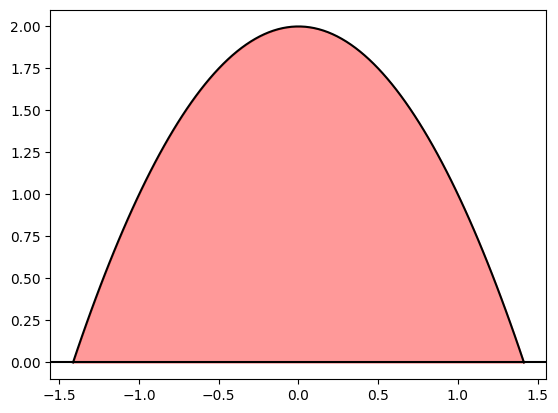

In [11]:
def f(x): return 2 - x**2
x = np.linspace(-2**(1/2), 2**(1/2), 100)
plt.plot(x, f(x), color ='black')
plt.fill_between(x, f(x), color = 'red', alpha = 0.4)
plt.axhline(color = 'black');

- The region in the first quadrant bounded above by the curve $y = 2x^4$, below by the $x$-axis, and on the right by $x=2$.